In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import OutputLoader, plot_2d_slice

In [2]:
v0 = 5.0
gamma = 5 / 3

base_path = f"/scratch/gpfs/TEYSSIER/jp7427/out/gresho-vortex/v0_{v0}/"

In [3]:
def compute_M(idx, mesh, w):
    x, y, _ = mesh.get_cell_centers()
    rho = w[idx("rho")]
    vx = w[idx("vx")] - v0
    vy = w[idx("vy")]
    P = w[idx("P")]

    xc = x - 0.5
    yc = y - 0.5
    r = np.sqrt(xc**2 + yc**2)

    v_phi = vx * (-yc / r) + vy * (xc / r)

    cs2 = gamma * P / rho
    cs = np.sqrt(np.maximum(cs2, 0.0))

    M = np.abs(v_phi) / cs

    return M


def compute_M_func(M_max):
    def f(idx, mesh, w):
        M = compute_M(idx, mesh, w)
        return M / M_max

    return f

Successfully read simulation output from "/scratch/gpfs/TEYSSIER/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/TEYSSIER/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/TEYSSIER/jp7427/out/gresho-vortex/v0_5.0/p7/M_max_0.001"


/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 1 not exactly matched in mesh; using nearest: 0.994792
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 1 not exactly matched in mesh; using nearest: 0.994792
 

(<matplotlib.image.AxesImage at 0x150205273c20>, None)

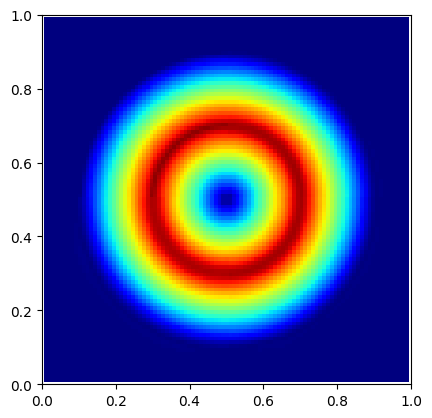

In [4]:
sim1 = OutputLoader(f"{base_path}/p7/M_max_0.1/")
sim2 = OutputLoader(f"{base_path}/p7/M_max_0.01/")
sim3 = OutputLoader(f"{base_path}/p7/M_max_0.001/")

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

style = dict(variable="w", cell_averaged=True, cmap="jet", vmin=0, vmax=1)

plot_2d_slice(
    sim1, ax, multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), t=0, **style
)
plot_2d_slice(
    sim1, ax, multivar_func=compute_M_func(0.1), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim2, ax, multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0, 0.5), **style
)
plot_2d_slice(
    sim3, ax, multivar_func=compute_M_func(0.001), x=(0, 0.5), y=(0, 0.5), **style
)

Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.1"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.001"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/gresho-vortex/p5/M_max_0.1"
Successfully read simulation output from 

/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.505208
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0 not exactly matched in mesh; using nearest: 0.00520833
  warnings.warn(
/home/jp7427/Desktop/superfv/superfv/visualization.py:43: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.5052

(<matplotlib.image.AxesImage at 0x148beec6a120>, None)

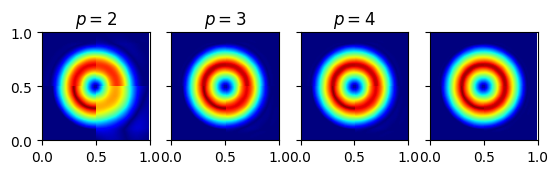

In [5]:
sim1 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.1/")
sim2 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.01/")
sim3 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p2/M_max_0.001/")

sim4 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.1/")
sim5 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.01/")
sim6 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p3/M_max_0.001/")

sim7 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.1/")
sim8 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.01/")
sim9 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p4/M_max_0.001/")

sim10 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p5/M_max_0.1/")
sim11 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p5/M_max_0.01/")
sim12 = OutputLoader("/scratch/gpfs/jp7427/out/gresho-vortex/p5/M_max_0.001/")

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)
axs[0].set_title(r"$p=2$")
axs[1].set_title(r"$p=3$")
axs[2].set_title(r"$p=4$")
axs[5].set_title(r"$p=5$")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

style = dict(variable="w", cell_averaged=True, cmap="jet", vmin=0, vmax=1)

plot_2d_slice(
    sim1,
    axs[0],
    multivar_func=compute_M_func(0.1),
    x=(0, 0.5),
    y=(0, 0.5),
    t=0,
    **style,
)
plot_2d_slice(
    sim1, axs[0], multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), **style
)
plot_2d_slice(
    sim2, axs[0], multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim3, axs[0], multivar_func=compute_M_func(0.001), x=(0.5, 1), y=(0, 0.5), **style
)

plot_2d_slice(
    sim4,
    axs[1],
    multivar_func=compute_M_func(0.1),
    x=(0, 0.5),
    y=(0, 0.5),
    t=0,
    **style,
)
plot_2d_slice(
    sim4, axs[1], multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), **style
)
plot_2d_slice(
    sim5, axs[1], multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim6, axs[1], multivar_func=compute_M_func(0.001), x=(0.5, 1), y=(0, 0.5), **style
)

plot_2d_slice(
    sim7,
    axs[2],
    multivar_func=compute_M_func(0.1),
    x=(0, 0.5),
    y=(0, 0.5),
    t=0,
    **style,
)
plot_2d_slice(
    sim7, axs[2], multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), **style
)
plot_2d_slice(
    sim8, axs[2], multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim9, axs[2], multivar_func=compute_M_func(0.001), x=(0.5, 1), y=(0, 0.5), **style
)

plot_2d_slice(
    sim10,
    axs[3],
    multivar_func=compute_M_func(0.1),
    x=(0, 0.5),
    y=(0, 0.5),
    t=0,
    **style,
)
plot_2d_slice(
    sim10, axs[3], multivar_func=compute_M_func(0.1), x=(0, 0.5), y=(0.5, 1), **style
)
plot_2d_slice(
    sim11, axs[3], multivar_func=compute_M_func(0.01), x=(0.5, 1), y=(0.5, 1), **style
)
plot_2d_slice(
    sim12, axs[3], multivar_func=compute_M_func(0.001), x=(0.5, 1), y=(0, 0.5), **style
)

In [6]:
fig.savefig("p2_p3_p4_p5.png", dpi=300)